In [1]:
!pip install torchsummary

In [2]:
pip install scikit-learn


                                              0.0/8.3 MB ? eta -:--:--
     --                                       0.5/8.3 MB 9.6 MB/s eta 0:00:01
     ---                                      0.8/8.3 MB 8.0 MB/s eta 0:00:01
     ----                                     0.9/8.3 MB 7.1 MB/s eta 0:00:02
     -----                                    1.1/8.3 MB 5.9 MB/s eta 0:00:02
     ------                                   1.3/8.3 MB 5.4 MB/s eta 0:00:02
     -------                                  1.5/8.3 MB 5.2 MB/s eta 0:00:02
     -------                                  1.6/8.3 MB 4.9 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 4.8 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 4.8 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 4.8 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 4.8 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 4.8 MB/s eta 

In [3]:
!pip install Pillow
!pip install matplotlib
!pip install torchvision

                                              0.0/2.5 MB ? eta -:--:--
                                              0.0/2.5 MB 653.6 kB/s eta 0:00:04
     --                                       0.1/2.5 MB 1.4 MB/s eta 0:00:02
     ---                                      0.2/2.5 MB 1.8 MB/s eta 0:00:02
     ------                                   0.4/2.5 MB 2.0 MB/s eta 0:00:02
     --------                                 0.5/2.5 MB 2.1 MB/s eta 0:00:01
     -----------                              0.7/2.5 MB 2.5 MB/s eta 0:00:01
     --------------                           0.9/2.5 MB 2.6 MB/s eta 0:00:01
     ----------------                         1.1/2.5 MB 2.8 MB/s eta 0:00:01
     -------------------                      1.2/2.5 MB 2.9 MB/s eta 0:00:01
     ----------------------                   1.4/2.5 MB 3.0 MB/s eta 0:00:01
     -------------------------                1.6/2.5 MB 3.1 MB/s eta 0:00:01
     ----------------------------             1.8/2.5 MB 3.2 MB/s eta

In [6]:
!pip install numpy
!pip install pandas
!pip install tqdm

  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)


In [7]:
import torch
import numpy as np
from PIL import Image
import pathlib
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.models as models
from torchsummary import summary
from sklearn.metrics import classification_report


num_epochs = 3
print(torch.__version__)
print(torch.cuda.is_available())

2.0.0+cpu
False


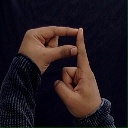

In [8]:
img = Image.open('./Sign Language images/P/0.jpg')
img

In [9]:
img_array = np.asarray(img)

# Print array shape
print(img_array.shape)

(128, 128, 3)


In [11]:

Image_dirs = './Sign Language images/'
data_dir   = pathlib.Path(Image_dirs)

# List of all files in the directory and its subdirectories
image_path = list(data_dir.glob('*/*.jpg'))

# total number of image files
image_count = len(image_path)

# Unique labels
Labels = list(set(p.parent.name for p in image_path))
print('Labels :',sorted(Labels))
num_labels = len(Labels)

# Print the results
print(f"Found {image_count} images in {num_labels} unique labels")

Labels : ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Found 42000 images in 35 unique labels


In [12]:
transforms = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize the image to 128x128 pixels
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=30),   # Rotate the image randomly up to 30 degrees
    transforms.RandomAffine(degrees=0, shear=45),   # Apply affine transformation with shear up to 30 degrees
    transforms.ToTensor(),    # Convert the image to a tensor
#     transforms.Normalize(mean=[0.5, 0.5, 0.5],
#                          std=[0.5, 0.5, 0.5])  # Normalize the pixel values
])


# ImageFolder dataset for the full dataset
full_dataset = datasets.ImageFolder(Image_dirs, transform=transforms)

# Split the dataset into training and testing sets
train_size = int(0.75 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = data.random_split(full_dataset, [train_size, test_size])

# Print the number of images in each set
print(f"Found {len(train_dataset)} images in the training set")
print(f"Found {len(test_dataset)} images in the testing set")


Found 31500 images in the training set
Found 10500 images in the testing set


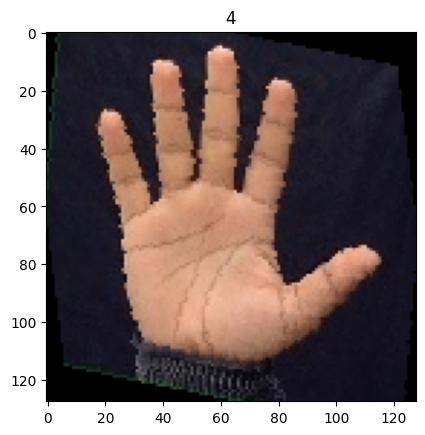

In [13]:
index = 7
img, label = train_dataset[index]
# Convert the PyTorch tensor to a NumPy array
img = img.numpy().transpose((1, 2, 0))
plt.title(label)
plt.imshow(img)
plt.show()

In [14]:
class Sign_Language(nn.Module):
    def __init__(self):
        super(Sign_Language, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(512, 35)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = x.view(-1, 128 * 16 * 16)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
model = Sign_Language()

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU if available
model.to(device)
summary(model, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
         MaxPool2d-4           [-1, 32, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          18,496
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
         MaxPool2d-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,856
      BatchNorm2d-10          [-1, 128, 32, 32]             256
             ReLU-11          [-1, 128, 32, 32]               0
        MaxPool2d-12          [-1, 128, 16, 16]               0
           Linear-13                  [-1, 512]      16,777,728
             ReLU-14                  [

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
batch_size = 50
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True) 

In [18]:
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    
    # Set the model to training mode
    model.train()
    
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update the training loss and accuracy
        train_loss += loss.item() * images.size(0)
        Max_val, pred_max_label =torch.max(outputs.data, 1)

     
        train_acc += (pred_max_label == labels).sum().item()            

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    
    # Evaluate the model on the test set
    test_loss = 0.0
    test_acc = 0.0
    
    # Set the model to evaluation mode
    model.eval()
    
    with torch.no_grad():
        for images, labels in test_loader:
            # Move the data to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Update the test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_acc += (predicted == labels).sum().item()
        
        test_loss /= len(test_loader.dataset)
        test_acc /= len(test_loader.dataset)
    
    # Print the epoch statistics
    print("Epoch {}, Train Loss: {:.4f}, Train Acc: {:.4f}, Test Loss: {:.4f}, Test Acc: {:.4f}".format(
        epoch+1,
        train_loss, 
        train_acc, 
        test_loss, 
        test_acc))

Epoch 1, Train Loss: 1.2651, Train Acc: 0.6477, Test Loss: 0.0275, Test Acc: 0.9954
Epoch 2, Train Loss: 0.3460, Train Acc: 0.8757, Test Loss: 0.0093, Test Acc: 0.9978
Epoch 3, Train Loss: 0.2614, Train Acc: 0.9046, Test Loss: 0.0028, Test Acc: 0.9991


In [19]:
model.eval()

# Get the predicted labels and true labels for the test set
predicted_labels = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Append the predicted and true labels to the lists
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

In [20]:
Labels_index = {value: key for key, value in full_dataset.class_to_idx.items()}

# Generate the classification report
target_names = [Labels_index[i] for i in range(len(Labels))]
print(classification_report(true_labels, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       315
           2       1.00      1.00      1.00       318
           3       1.00      1.00      1.00       315
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       293
           6       1.00      1.00      1.00       296
           7       1.00      1.00      1.00       300
           8       1.00      1.00      1.00       327
           9       1.00      1.00      1.00       291
           A       1.00      1.00      1.00       313
           B       1.00      1.00      1.00       278
           C       1.00      1.00      1.00       285
           D       1.00      1.00      1.00       323
           E       1.00      1.00      1.00       307
           F       1.00      1.00      1.00       284
           G       1.00      1.00      1.00       302
           H       1.00      1.00      1.00       285
           I       1.00    

In [21]:
model_file = 'mymodel.pt'

# Save the model
torch.save(model, model_file)

In [22]:
path = "./mymodel.pt"

# Load the model
Model = torch.load(path)
Model.to(device)

Sign_Language(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=35,

torch.Size([1, 3, 128, 128])


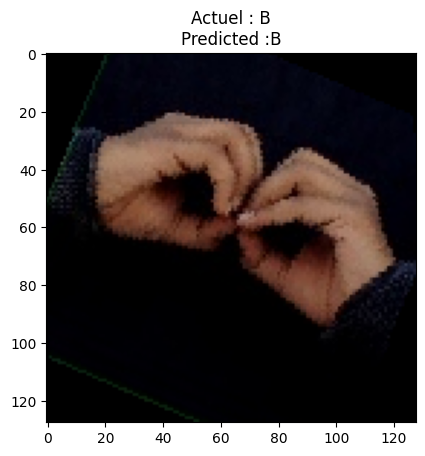

In [52]:
img_path = './Sign Language images/B/11.jpg'
img = Image.open(img_path)
# Apply the transform to the image
img = transforms(img)
plt.imshow(img.permute(1, 2, 0))
img = img.to(device).unsqueeze(0)  # add batch dimension
print(img.shape)

# Pass the transformed image to the model
output = Model(img)
Max_val, label =torch.max(output.data, 1)
# Reverse the dictionary
Labels_index = {value: key for key, value in full_dataset.class_to_idx.items()}

plt.title('Actuel : {}\nPredicted :{}'.format(img_path.split('/')[-2],
                                       Labels_index[label.item()]))
plt.show()

In [34]:
import torch
import cv2
import numpy as np

# Load the Indian Sign Language model
model = torch.load('../pawan/mymodel.pt', map_location=torch.device('cpu'))
model.eval()

def sign_from_prediction_value(value):
    if value < 10:
        return chr(value + 48)
    return chr(value + 55)

# PreProcess the image before classification
def preprocess_image(frame):
    # Resize the image to (128, 128) and convert it to RGB format
    resized = cv2.resize(frame, (128, 128))
    resized = np.transpose(resized, (2, 0, 1))
    resized = np.expand_dims(resized, axis=0)
    resized = resized.astype(np.float32)
    return resized

# Function to predict the sign from webcam input
def predict_sign():
    # Open the webcam
    cap = cv2.VideoCapture(0)

    while True:
        # Read the frame from the webcam
        ret, frame = cap.read()
        frame = cv2.rectangle(frame, (425,100),(625,300), (0,255,0), thickness=2, lineType=8, shift=0)

        # Preprocess the frame before classification
        preprocessed_frame = preprocess_image(frame)

        # Perform the prediction
        with torch.no_grad():
            inputs = torch.from_numpy(preprocessed_frame)
            outputs = model(inputs)
            prediction_p = torch.nn.functional.softmax(outputs, dim=1)
            yhat = np.argmax(prediction_p.cpu().numpy())

        # Get the predicted sign label
        sign = sign_from_prediction_value(yhat)
        print(sign)
        # Display the predicted sign label on the screen
        cv2.putText(frame, sign, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Extract the image from the batch
        image = np.squeeze(preprocessed_frame, axis=0)

        # Reshape the image to the correct dimensions
        image = cv2.resize(image.transpose(1, 2, 0), (128, 128))

        # Display the frame
        cv2.imshow('Indian Sign Language Recognition', frame)
        print("---------------------------")
        # Stop the program when the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close all windows
    cap.release()
    cv2.destroyAllWindows()

# Call the function to start predicting signs from webcam input
predict_sign()


G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
---------------------------
G
--------

In [31]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [ ]:
# Load the pre-trained ResNet50 model
Resnet50 = models.resnet50(pretrained=True)

# Freeze all parameters in the model
for param in Resnet50.parameters():
    param.requires_grad = False

# Replace the final layer with a new, untrained linear layer
num_features = Resnet50.fc.in_features
Resnet50.fc = torch.nn.Linear(num_features, 35)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Resnet50.parameters(), lr=0.001)

# Set the device to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Resnet50 = Resnet50.to(device)
summary(Resnet50,(3,128,128))

In [ ]:
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    
    # Set the model to training mode
    Resnet50.train()
    
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = Resnet50(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update the training loss and accuracy
        train_loss += loss.item() * images.size(0)
        Max_val, pred_max_label =torch.max(outputs.data, 1)

     
        train_acc += (pred_max_label == labels).sum().item()            

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    
    # Evaluate the model on the test set
    test_loss = 0.0
    test_acc = 0.0
    
    # Set the model to evaluation mode
    Resnet50.eval()
    
    with torch.no_grad():
        for images, labels in test_loader:
            # Move the data to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = Resnet50(images)
            loss = criterion(outputs, labels)
            
            # Update the test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_acc += (predicted == labels).sum().item()
        
        test_loss /= len(test_loader.dataset)
        test_acc /= len(test_loader.dataset)
    
    # Print the epoch statistics
    print("Epoch {}, Train Loss: {:.4f}, Train Acc: {:.4f}, Test Loss: {:.4f}, Test Acc: {:.4f}".format(
        epoch+1,
        train_loss, 
        train_acc, 
        test_loss, 
        test_acc))

In [ ]:
Resnet50.eval()

# Get the predicted labels and true labels for the test set
predicted_labels = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = Resnet50(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Append the predicted and true labels to the lists
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

In [ ]:
Labels_index = {value: key for key, value in full_dataset.class_to_idx.items()}

# Generate the classification report
target_names = [Labels_index[i] for i in range(len(Labels))]
print(classification_report(true_labels, predicted_labels, target_names=target_names))

In [ ]:
# Define the model file path
model_file = 'Resnet50.pt'

# Save the model
torch.save(Resnet50, model_file)

In [ ]:
path = "/kaggle/working/Resnet50.pt"

# Load the model
Resnet = torch.load(path)
Resnet.to(device)

In [ ]:
img_path = '/kaggle/input/sign-language/Sign Language images/Y/23.jpg'
img = Image.open(img_path)
# Apply the transform to the image
img = transforms(img)
plt.imshow(img.permute(1, 2, 0))
img = img.to(device).unsqueeze(0)  # add batch dimension
print(img.shape)

# Pass the transformed image to the model
output = Resnet(img)
Max_val, label =torch.max(output.data, 1)
# Reverse the dictionary
Labels_index = {value: key for key, value in full_dataset.class_to_idx.items()}

plt.title('Actuel : {}\nPredicted :{}'.format(img_path.split('/')[-2],
                                       Labels_index[label.item()]))
plt.show()

In [ ]:
Resnet18 = models.resnet18(pretrained=True)

# Replace the last fully connected layer with a new layer with the number of classes in the dataset
num_classes = 35
Resnet18.fc = nn.Linear(512, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Resnet18.parameters(), lr=0.001)

# Set the device to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Resnet18 = Resnet18.to(device)
summary(Resnet18,(3,128,128))


In [ ]:
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    
    # Set the model to training mode
    Resnet18.train()
    
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = Resnet18(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update the training loss and accuracy
        train_loss += loss.item() * images.size(0)
        Max_val, pred_max_label =torch.max(outputs.data, 1)

     
        train_acc += (pred_max_label == labels).sum().item()            

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    
    # Evaluate the model on the test set
    test_loss = 0.0
    test_acc = 0.0
    
    # Set the model to evaluation mode
    Resnet18.eval()
    
    with torch.no_grad():
        for images, labels in test_loader:
            # Move the data to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = Resnet18(images)
            loss = criterion(outputs, labels)
            
            # Update the test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_acc += (predicted == labels).sum().item()
        
        test_loss /= len(test_loader.dataset)
        test_acc /= len(test_loader.dataset)
    
    # Print the epoch statistics
    print("Epoch {}, Train Loss: {:.4f}, Train Acc: {:.4f}, Test Loss: {:.4f}, Test Acc: {:.4f}".format(
        epoch+1,
        train_loss, 
        train_acc, 
        test_loss, 
        test_acc))

In [ ]:
Resnet18.eval()

# Get the predicted labels and true labels for the test set
predicted_labels = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        # Move the data to the GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = Resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Append the predicted and true labels to the lists
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

In [ ]:
# Define the model file path
model_file = 'Resnet18.pt'

# Save the model
torch.save(Resnet18, model_file)

In [ ]:
path = "/kaggle/working/Resnet18.pt"

# Load the model
Resnet_18 = torch.load(path)
Resnet_18 = Resnet_18.to(device)

In [ ]:
img_path = '/kaggle/input/sign-language/Sign Language images/P/0.jpg'

img = Image.open(img_path)
img = transforms(img)
plt.imshow(img.permute(1, 2, 0))
img = img.to(device).unsqueeze(0)  # add batch dimension
print(img.shape)

# Pass the transformed image to the model
output = Resnet_18(img)
Max_val, label =torch.max(output.data, 1)
# Reverse the dictionary
Labels_index = {value: key for key, value in full_dataset.class_to_idx.items()}

plt.title('Actuel : {}\nPredicted :{}'.format(img_path.split('/')[-2],
                                       Labels_index[label.item()]))
plt.show()